In [90]:
import numpy as np
from matplotlib import pylab as plt
from collections import Counter

%matplotlib inline

In [29]:
DATA_FILE = './data/datingTestSet.txt'

In [70]:
def read_raw_data(file):
    X = []
    Y = []
    
    with open(DATA_FILE) as f:
        for line in f:
            parts = line.strip().split('\t')
            X.append(parts[:3])
            Y.append(parts[-1])
            
    X, Y = np.array(X, dtype=np.float), np.array(Y)
    
    Y[Y == 'didntLike'] = 0
    Y[Y == 'smallDoses'] = 1
    Y[Y == 'largeDoses'] = 2
    Y = Y.astype(np.int)
    
    return X, Y

In [71]:
X, Y = read_raw_data(DATA_FILE)
X.shape, Y.shape

((1000, 3), (1000,))

In [85]:
(Y == 0).sum(), (Y == 1).sum(), (Y == 2).sum()

(342, 331, 327)

In [117]:
X_train = X[:700]
Y_train = Y[:700]
X_test = X[700:]
Y_test = Y[700:]

No handles with labels found to put in legend.


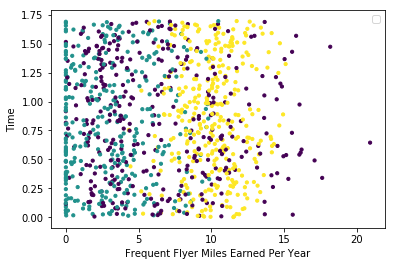

In [118]:
plt.scatter(X[:, 1], X[:, 2], s=10, c=15.0 * Y)
plt.xlabel('Frequent Flyer Miles Earned Per Year')
plt.ylabel('Time')
plt.legend()

In [163]:
class Scaler:
    def fit_transform(self, X):
        self._min = np.min(X, axis=0)
        self._max = np.max(X, axis=0)
        
        return (X - self._min) / (self._max - self._min + 1e-7)
    
    def transform(self, X):
        return (X - self._min) / (self._max - self._min + 1e-7)

In [164]:
scaler = Scaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [124]:
def l2_distance(A, b):
    diff = A - b
    diff_l2_norm= np.sqrt(np.sum(np.square(diff), axis=1))
    
    return diff_l2_norm

In [144]:
def kNN_predict(input_x, train_X, train_Y, k=10, distance_func=l2_distance):
    distances = distance_func(train_X, input_x)
    near_k_indexes = np.argsort(distances)[:k]
    near_k_label = train_Y[near_k_indexes]
    
    return Counter(near_k_label).most_common(1)[0][0]

In [145]:
def kNN_evaluate(train_X, train_Y, test_X, test_Y, k=10):
    test_len = test_X.shape[0]
    
    predict_Y = []
    for i in range(test_len):
        test_x = test_X[i]
        predict_y = kNN_predict(test_x, train_X, train_Y, k)
        predict_Y.append(predict_y)
        
    predict_Y = np.stack(predict_Y)
    
    accuracy = (predict_Y == test_Y).sum() / test_len
    
    return accuracy

In [146]:
kNN_evaluate(X_train_scale, Y_train, X_test_scale, Y_test, k=10)

0.9633333333333334

### sklearn实现

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [154]:
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [178]:
kNN = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [179]:
kNN.fit(X_train_scale, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [180]:
prediction_test = kNN.predict(X_test_scale)

In [181]:
metrics.accuracy_score(Y_test, prediction_test)

0.9633333333333334